In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
aapl_raw_data = pd.read_csv('aapl_backtest.csv')

In [3]:
aapl_put_data = aapl_raw_data[['ticker', 'stkpx', 'expirdate', 'yte', 'strike', 'transact_date', 'transact_pbidpx', 'transact_pvalue',
       'transact_paskpx',  'pbidpx',
       'pvalue', 'paskpx', 'delta', 'gamma', 'theta', 'vega', 'rho', 'phi', 'trade_date']]

In [4]:
aapl_put_data['PeriodPnL'] = aapl_put_data['transact_pvalue'] - aapl_put_data['pvalue']

<ipython-input-4-6031f2da92dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_put_data['PeriodPnL'] = aapl_put_data['transact_pvalue'] - aapl_put_data['pvalue']


In [5]:
figure(figsize=(10,6), dpi=80)
aapl_put_data['Date'] = pd.to_datetime(aapl_put_data['trade_date'])

<ipython-input-5-0a83fd985c90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_put_data['Date'] = pd.to_datetime(aapl_put_data['trade_date'])


<Figure size 800x480 with 0 Axes>

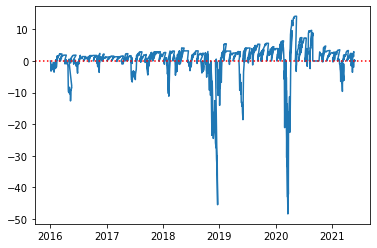

In [6]:
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
plt.plot(aapl_put_data['Date'], aapl_put_data['PeriodPnL'])
plt.axhline(y=0, color='r', linestyle=':')

Stop loss if loss > credit collected

In [7]:
aapl_put_data['Loss100'] = (aapl_put_data['PeriodPnL'] + 2.0*aapl_put_data['transact_pvalue'])<=0

<ipython-input-7-64f143edf12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_put_data['Loss100'] = (aapl_put_data['PeriodPnL'] + 2.0*aapl_put_data['transact_pvalue'])<=0


Find stop loss day

In [10]:
aapl_put_data['LossDate'] = aapl_put_data['Loss100']*aapl_put_data['trade_date']
stop_loss_dates_finder =  stop_loss_dates_finder[['expirdate','Loss100','LossDate']]
stop_loss_dates_finder = stop_loss_dates_finder[stop_loss_dates_finder['Loss100']==True]
stop_loss_dates = stop_loss_dates_finder.groupby('expirdate').agg({'LossDate':np.min}).reset_index(drop=False)
stop_loss_dates = stop_loss_dates.rename(columns={'LossDate':'MinLossDate'})
stop_loss_dates

,expirdate,MinLossDate
0,2016-05-20,2016-04-27
1,2016-07-15,2016-06-27
2,2017-07-21,2017-06-09
3,2018-02-16,2018-02-02
4,2018-11-16,2018-10-29
5,2018-12-21,2018-11-13
6,2019-01-18,2018-12-21
7,2019-06-21,2019-05-13
8,2020-03-20,2020-02-27
9,2020-04-17,2020-03-12


In [23]:
appl_portfolio = pd.merge(aapl_put_data, stop_loss_dates, on=['expirdate'], how='left')
appl_portfolio['stopLoss'] = appl_portfolio['Date']>=appl_portfolio['MinLossDate']
#appl_portfolio = appl_portfolio[appl_portfolio['MinLossDate'].isna()==True]

In [24]:
appl_portfolio

,ticker,stkpx,expirdate,yte,strike,transact_date,transact_pbidpx,transact_pvalue,transact_paskpx,pbidpx,...,vega,rho,phi,trade_date,PeriodPnL,Date,Loss100,LossDate,MinLossDate,stopLoss
0,AAPL,105.22,2016-02-19,0.12603,97.5,2016-01-04,2.09,2.08,2.12,2.09,...,0.121235,0.086937,-0.098732,2016-01-04,0.00,2016-01-04,False,,NaN,False
1,AAPL,102.78,2016-02-19,0.12329,97.5,2016-01-04,2.09,2.08,2.12,2.78,...,0.125749,0.077288,-0.086364,2016-01-05,-0.55,2016-01-05,False,,NaN,False
2,AAPL,100.37,2016-02-19,0.12055,97.5,2016-01-04,2.09,2.08,2.12,3.65,...,0.134802,0.066175,-0.073370,2016-01-06,-1.50,2016-01-06,False,,NaN,False
3,AAPL,97.14,2016-02-19,0.11781,97.5,2016-01-04,2.09,2.08,2.12,5.40,...,0.133097,0.052050,-0.057273,2016-01-07,-3.22,2016-01-07,False,,NaN,False
4,AAPL,96.99,2016-02-19,0.11507,97.5,2016-01-04,2.09,2.08,2.12,5.15,...,0.131498,0.050361,-0.055158,2016-01-08,-3.08,2016-01-08,False,,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,AAPL,126.85,2021-06-18,0.06575,125.0,2021-04-30,2.28,2.30,2.29,2.12,...,0.124776,0.048397,-0.051050,2021-05-25,0.17,2021-05-25,False,,NaN,False
2066,AAPL,126.73,2021-06-18,0.06301,125.0,2021-04-30,2.28,2.30,2.29,2.01,...,0.122034,0.047209,-0.049453,2021-05-26,0.29,2021-05-26,False,,NaN,False
2067,AAPL,125.85,2021-06-18,0.06027,125.0,2021-04-30,2.28,2.30,2.29,2.30,...,0.121485,0.040978,-0.042849,2021-05-27,0.00,2021-05-27,False,,NaN,False
2068,AAPL,125.05,2021-06-18,0.05753,125.0,2021-04-30,2.28,2.30,2.29,2.39,...,0.119614,0.035708,-0.037105,2021-05-28,-0.10,2021-05-28,False,,NaN,False


In [14]:
portfolio = appl_portfolio[appl_portfolio['stopLoss']==False]
# portfolio.to_csv('portfolio.csv')

In [16]:
portfolio['Date']

95     2016-04-04
96     2016-04-05
97     2016-04-06
98     2016-04-07
99     2016-04-08
          ...    
1981   2021-03-15
1982   2021-03-16
1983   2021-03-17
1984   2021-03-18
1985   2021-03-19
Name: Date, Length: 230, dtype: datetime64[ns]

In [ ]:
portfolio_period_end = portfolio.groupby(['expirdate'])['PeriodPnL'].last().reset_index(drop=False)
portfolio_period_end['TotalPnL'] = portfolio_period_end['PeriodPnL'].cumsum()

In [ ]:
portfolio_period_end.to_csv('aapl_portfolio.csv')

In [ ]:
figure(figsize=(10,6), dpi=80)
plt.plot(portfolio_period_end['TotalPnL']*100)

In [ ]:
figure(figsize=(10,6), dpi=80)
plt.plot(portfolio['PeriodPnL']*100)
plt.axhline(y=0, color='r', linestyle=':')